<a href="https://colab.research.google.com/github/jseeun00/ESAA_2021-2/blob/main/9%EC%A3%BC%EC%B0%A8_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_3_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [12]:
X,y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [13]:
import numpy as np
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**1번 문제**

In [ ]:
#코드 돌아가는 데 시간이 너무 많이 소요됨
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

**2번 문제- 데이터 증식**

In [15]:
from scipy.ndimage.interpolation import shift

In [16]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28)) #이미지가 28*28 픽셀
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant") # scipy.ndimage.interpolation라이브러리 내의 shift()메서드 이용
                                                                    # 아래로 dy만큼 이동, 오른쪽으로 dx만큼 이동
    return shifted_image.reshape([-1]) 
#shift()함수를 사용하여 배열의 요소를 이동할 수 있음

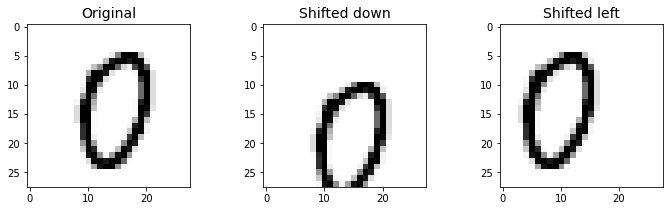

In [18]:
image = X_train[1000] #X_train의 인덱스가 1000인 데이터
shifted_image_down = shift_image(image, 0, 5) # image를 아래로 5, 오른쪽으로 0 이동
shifted_image_left = shift_image(image, -5, 0) # image를 아래로 0, 오른쪽으로 -5 이동

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(12,3)) 
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [19]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)): #데이터 증식
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [20]:
shuffle_idx = np.random.permutation(len(X_train_augmented)) #무작위로 len(X_train_augmented) 배열 섞음
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
# 앞서 코드가 돌아가는 데 시간이 오래 걸려 grid_search.best_params_ 이용 못 함
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)

In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

#0.9763
#데이터를 증식해서 0.5% 정확도를 높일 수 있음